<a href="https://colab.research.google.com/github/samuel-oluwemimo/machine_learning/blob/main/HOML_Classsification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLASSIFICATION OF MNIST DATASET

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X,y = mnist['data'], mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

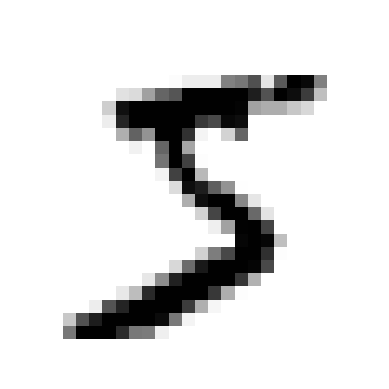

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

X = pd.DataFrame(X)

someDigit = X.iloc[0]
someDigitImage = someDigit.values.reshape(28,28)

plt.imshow(someDigitImage, cmap = mpl.cm.binary, interpolation= 'nearest')
plt.axis('off')
plt.show()

In [4]:
import numpy as np

y = y.astype(np.uint8)

In [5]:
y[0]

5

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.143, random_state=42)

In [8]:
y_train_5 = y_train == 5
y_test_5 = y_test == 5

In [9]:
from sklearn.linear_model import SGDClassifier

In [10]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [11]:
sgd_clf.predict([someDigit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

# Model Evaluation

In [12]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.96454468, 0.96289443, 0.96644329])

In [13]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53754,   860],
       [ 1262,  4114]])

In [15]:
from sklearn.metrics import recall_score, precision_score

In [16]:
precision_score(y_train_5, y_train_pred)

0.8271009248090069

In [17]:
recall_score(y_train_5, y_train_pred)

0.7652529761904762

In [18]:
from sklearn.metrics import f1_score

f1_score(y_train_5,y_train_pred)

0.794975845410628

In [19]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [20]:
from sklearn.metrics import precision_recall_curve

In [21]:
precision, recall, thresholds = precision_recall_curve(y_train_5, y_scores)

In [22]:
def plotRecallPrecisionVSThresholds(precision,recall,thresholds):
  plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
  plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
  # plt.axhline(y=thresholds, color='r', linestyle='--', label='Threshold')
  plt.legend()
  plt.grid()
  plt.show()

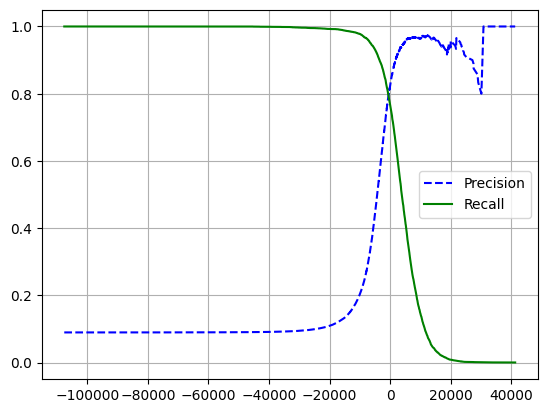

In [23]:
plotRecallPrecisionVSThresholds(precision,recall,thresholds)

# Using the ROC curve


In [24]:
from sklearn.metrics import roc_curve

In [25]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [26]:
def plotRocCurve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=1, label=label)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate (Recall)')
  plt.grid()
  plt.show()

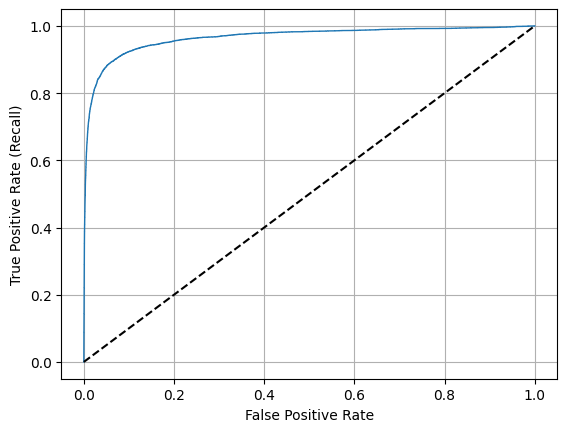

In [27]:
plotRocCurve(fpr, tpr)

In [28]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5,y_scores)

0.9653891190303987

# Using Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
forest_clf = RandomForestClassifier(random_state=42)
y_proba_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [31]:
y_scores_forest = y_proba_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

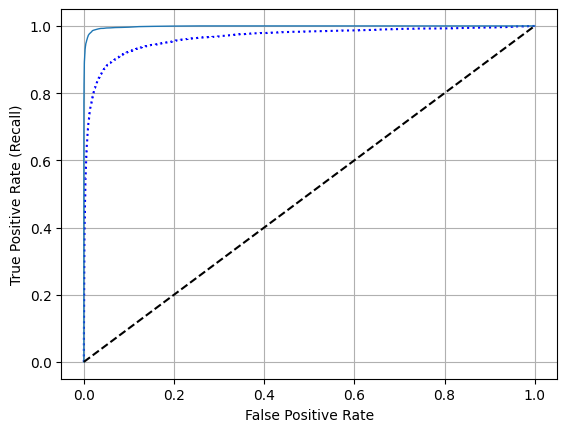

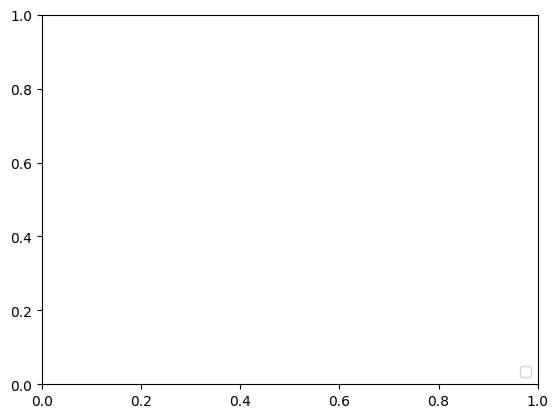

In [32]:
plt.plot(fpr, tpr, "b:", label="SGD")
plotRocCurve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")

In [33]:
roc_auc_score(y_train_5,y_scores_forest)

0.9984315178102772

# MultiClass Classification

In [34]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([someDigit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

In [35]:
someDigitScores = sgd_clf.decision_function([someDigit])
someDigitScores

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-11063.9333408 , -26591.81098046,  -6843.22017004,
          -293.47810399, -29678.60886231,  -1818.67359708,
        -21461.50455604, -14186.09330544,  -6876.3449521 ,
        -13971.24690241]])

In [36]:
np.argmax(someDigitScores)

3

In [37]:
sgd_clf.classes_[3]

3

In [38]:
from sklearn.multiclass import OneVsOneClassifier

In [39]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([someDigit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [40]:
len(ovo_clf.estimators_)

45

# Random forest

In [41]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
forest_clf.predict([someDigit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [43]:
forest_clf.predict_proba([someDigit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.  , 0.  , 0.  , 0.07, 0.  , 0.86, 0.  , 0.  , 0.06, 0.01]])

In [44]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87378107, 0.86222933, 0.8764753 ])

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.90578587, 0.90898635, 0.89952991])

# Error Analysis

In [47]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5627,    0,   15,   10,    9,   44,   37,    6,  168,    2],
       [   1, 6414,   49,   20,    3,   39,    7,   10,  170,   11],
       [  28,   27, 5354,   86,   71,   27,   54,   46,  314,   15],
       [  26,   17,  131, 5277,    1,  202,   26,   43,  325,   58],
       [  12,   17,   53,    5, 5316,    8,   40,   27,  246,  192],
       [  34,   16,   25,  158,   51, 4494,   90,   22,  409,   77],
       [  30,   19,   61,    1,   44,   93, 5544,    8,  113,    0],
       [  22,   19,   65,   26,   39,   12,    6, 5682,  122,  245],
       [  21,   60,   55,   90,    2,  134,   31,    6, 5407,   50],
       [  25,   19,   29,   61,  136,   37,    1,  176,  275, 5162]])

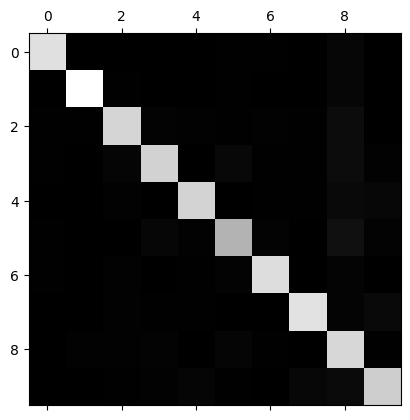

In [48]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

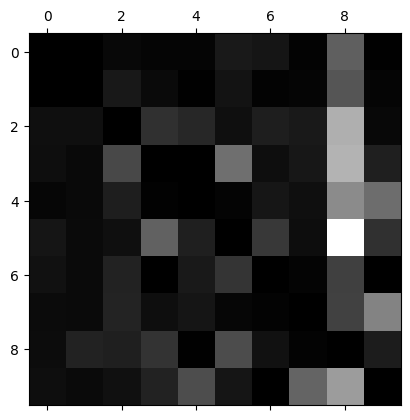

In [49]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()